In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import warnings
warnings.warn("deprecated", DeprecationWarning)
warnings.simplefilter("ignore")
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

/home/dside/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: deprecated
  if __name__ == '__main__':


In [3]:
# # Education level by gender
df_educationlevel = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_AGE_20_TO_24_EDUCATION_LEVEL_South_Africa.csv')
# Education Attentrnce level by age group
df_attenlevel = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_EDUCATION_ATTENDANCE_AGE_INCOMPLETED_YEARS_GENDER_South_Africa.csv',\
                           )

In [4]:
# Adults employed at home
df_adultempl_home = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_HOUSEHOLD_EMPLOYMENT_South_Africa.csv',\
                               )
# Youth current activities by gender
df_empl = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_EMPLOYMENT_EDUCATION_TRAINING_GENDER_South_Africa.csv',\
                     )

# Youth employment status by gender
df_empl_labour = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_LABOUR_FORCE_OFFICIAL_AGE_GROUP_GENDER_South_Africa.csv',\
                            )


In [5]:
# Poverty by youth age group
df_poverty = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_INCOME_POVERTY_AGE_GROUP_South_Africa.csv',\
                               )
# youth  with/without guardians
df_livingparent = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_LIVING_WITH_PARENTS_GENDER_South_Africa.csv',\
                               )

# youth  in multi-poverty by age gruop
df_povery_multi = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_INCOME_POVERTY_AGE_GROUP_South_Africa.csv',\
                               )

# youth  in multi-dimensional poverty by race
df_provery_multirace = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_MULTIDIMENSIONALLY_POOR_GENDER_POPULATION_GROUP_South_Africa.csv',\
                               )

In [6]:
# Youth birth place within the South Africa
df_birth_prov = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_PROVINCE_OF_BIRTH_South_Africa.csv',\
                           )
# Citizenship
df_birth = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_REGION_OF_BIRTH_South_Africa.csv',\
                      )

In [7]:
# Remove the population pf the whole country:ZA
df_empl = df_empl[df_empl.geo_code != 'ZA']
df_birth_prov = df_birth_prov[df_birth_prov.geo_code != 'ZA']
df_birth = df_birth[df_birth.geo_code != 'ZA']
df_empl_labour = df_empl_labour[df_empl_labour.geo_code != 'ZA']
df_adultempl_home = df_adultempl_home[df_adultempl_home.geo_code != 'ZA']
df_birth_prov = df_birth_prov[df_birth_prov.geo_code != 'ZA']
df_educationlevel = df_educationlevel[df_educationlevel.geo_code != 'ZA']
df_attenlevel = df_attenlevel[df_attenlevel.geo_code != 'ZA']
df_poverty = df_poverty[df_poverty.geo_code != 'ZA']
df_livingparent = df_livingparent[df_livingparent.geo_code != 'ZA']
df_provery_multirace = df_provery_multirace[df_provery_multirace.geo_code != 'ZA']

In [8]:
def normalize_data(x):
    """
    normalizes the input data x 
    """

    x1 = x.iloc[:, :4]
    x2 = x.iloc[:,5:].div(x.total, axis=0)
    x3 = pd.concat([x1,x2],axis=1)
    return x3

In [9]:
Youthpoorrace = normalize_data(df_provery_multirace)
YouthMigration = normalize_data(df_birth)

Youthliving_parents = normalize_data(df_livingparent)

Employemnt_data    = normalize_data(df_empl_labour)   

EmployedAdults_data = normalize_data(df_adultempl_home)

Educationlevel_data = normalize_data(df_educationlevel)

Poverty_data        = normalize_data(df_poverty)
EmployedYouth        = normalize_data(df_empl)
Employemnt_data    = normalize_data(df_empl_labour)

In [10]:
print ("Education:", Educationlevel_data.columns)
print(" ")
print ("Adult employed:", EmployedAdults_data.columns)
print(" ")
print ("Education level:", Educationlevel_data.columns)
print(" ")
print ("Poverty:" ,Poverty_data.columns)
print(" ")
print ("Employed youth:", EmployedYouth.columns)

('Education:', Index([u'geo_level', u'geo_code', u'geoid', u'name', u'Any tertiary',
       u'Any tertiary-Female', u'Any tertiary-Male', u'Grade 10/11',
       u'Grade 10/11-Female', u'Grade 10/11-Male', u'Grade 9',
       u'Grade 9-Female', u'Grade 9-Male', u'Less than Grade9',
       u'Less than Grade9-Female', u'Less than Grade9-Male',
       u'Matric/matric equivalent', u'Matric/matric equivalent-Female',
       u'Matric/matric equivalent-Male'],
      dtype='object'))
 
('Adult employed:', Index([u'geo_level', u'geo_code', u'geoid', u'name',
       u'At least one employed adult', u'No employed adult'],
      dtype='object'))
 
('Education level:', Index([u'geo_level', u'geo_code', u'geoid', u'name', u'Any tertiary',
       u'Any tertiary-Female', u'Any tertiary-Male', u'Grade 10/11',
       u'Grade 10/11-Female', u'Grade 10/11-Male', u'Grade 9',
       u'Grade 9-Female', u'Grade 9-Male', u'Less than Grade9',
       u'Less than Grade9-Female', u'Less than Grade9-Male',
       u'Ma

In [11]:
print Employemnt_data.shape
print EmployedAdults_data.shape
print Educationlevel_data.shape
print Poverty_data.shape

(278, 18)
(278, 6)
(278, 19)
(278, 20)


In [12]:
EmployedYouth.columns

Index([u'geo_level', u'geo_code', u'geoid', u'name', u'Employed',
       u'Employed-Female', u'Employed-Male', u'NEET', u'NEET-Female',
       u'NEET-Male', u'School/post-school',
       u'School/post-school-employment education training',
       u'School/post-school-Female', u'School/post-school-Male'],
      dtype='object')

In [13]:
# Predicting variables

Inputfeatures = pd.DataFrame()

Inputfeatures[[
     'Multidimensionally poverty'
       ]]= Youthpoorrace[['Multidimensionally poor'
       
       ]]

Inputfeatures[['Other',
       'Rest of Africa', 'SADC', 'South Africa', 'Unspecified']]= YouthMigration[['Other',
       'Rest of Africa', 'SADC', 'South Africa', 'Unspecified']]


Inputfeatures[['Both parents', 'Father only','Mother only',
               'Neither parent']]= Youthliving_parents[['Both parents',
                                                        'Father only',
                                                       'Mother only',
                                                       'Neither parent']]

Inputfeatures[['Atleast_one_employed_adult',\
            'No_employed_adult']]= EmployedAdults_data[['At least one employed adult','No employed adult']]

    
Inputfeatures[['Youth_finished_school','youth_doingnothing']]= EmployedYouth[['NEET',
                                    'School/post-school']]

Inputfeatures[['Youth_poverty_15_24','Youth_poverty_25_34','Non-poor-25-34',
               'Non-poor-15-24']] = Poverty_data[['Income-poor-15-24',\
                                                                             'Income-poor-25-34',
                                                                             'Non-poor-25-34',
                                                                             'Non-poor-15-24']]
Inputfeatures[['Any tertiary','Matric/matric equivalent','Grade 10/11'] ]= Educationlevel_data[['Any tertiary','Matric/matric equivalent','Grade 10/11']]

Inputfeatures['Employmente by gender'] = EmployedYouth['Employed']
Inputfeatures['Employment by age'] = Employemnt_data['employed']
Employemnt_data
# Predicted variable
Outputfeature = pd.DataFrame()
Outputfeature['Employment'] = EmployedYouth['Employed']
Inputfeatures

,Multidimensionally poverty,Other,Rest of Africa,SADC,South Africa,Unspecified,Both parents,Father only,Mother only,Neither parent,...,youth_doingnothing,Youth_poverty_15_24,Youth_poverty_25_34,Non-poor-25-34,Non-poor-15-24,Any tertiary,Matric/matric equivalent,Grade 10/11,Employmente by gender,Employment by age
1,0.246780,0.002835,0.004330,0.005047,0.985015,0.002773,0.353723,0.052964,0.317108,0.276206,...,0.376380,0.089266,0.068739,0.092204,0.083167,0.040197,0.405240,0.283724,0.271692,0.600392
2,0.297826,0.002803,0.003870,0.018417,0.972641,0.002269,0.312427,0.052846,0.353078,0.281649,...,0.341803,0.087659,0.085466,0.105710,0.073138,0.030568,0.377001,0.324115,0.246790,0.452900
3,0.285728,0.004381,0.006380,0.022760,0.962289,0.004190,0.310014,0.046835,0.341760,0.301391,...,0.378113,0.087142,0.074968,0.098509,0.072218,0.033145,0.370242,0.301402,0.257588,0.535584
4,0.253571,0.005249,0.000875,0.002625,0.991251,0.000000,0.295935,0.026016,0.305691,0.372358,...,0.286701,0.077143,0.066939,0.084490,0.069252,0.044326,0.276596,0.246454,0.380829,0.728926
5,0.365314,0.000454,0.002721,0.002721,0.994104,0.000000,0.361721,0.044776,0.292362,0.301141,...,0.292672,0.118472,0.091498,0.048782,0.053128,0.021159,0.281509,0.208832,0.251707,0.656361
6,0.265396,0.000749,0.002122,0.002871,0.993758,0.000499,0.278826,0.040531,0.280224,0.400419,...,0.414370,0.107787,0.079952,0.058334,0.060718,0.026412,0.404550,0.267521,0.201176,0.541931
7,0.453636,0.001168,0.001502,0.012016,0.983611,0.001702,0.157733,0.036044,0.335182,0.471041,...,0.531499,0.165292,0.091284,0.053115,0.046542,0.019414,0.442038,0.298570,0.131730,0.421178
8,0.309824,0.001652,0.002328,0.036342,0.954272,0.005406,0.273966,0.054514,0.329720,0.341800,...,0.423967,0.111937,0.079583,0.096498,0.078139,0.037095,0.401529,0.318703,0.219492,0.519569
9,0.250169,0.001866,0.001279,0.032690,0.959244,0.004921,0.230655,0.048417,0.347578,0.373350,...,0.518312,0.132178,0.086004,0.090601,0.078220,0.049371,0.483826,0.283233,0.161957,0.462690
10,0.277221,0.002823,0.003893,0.071849,0.911553,0.009882,0.269754,0.052372,0.298249,0.379624,...,0.370552,0.071590,0.057448,0.161587,0.104567,0.044274,0.454787,0.286357,0.245540,0.493384


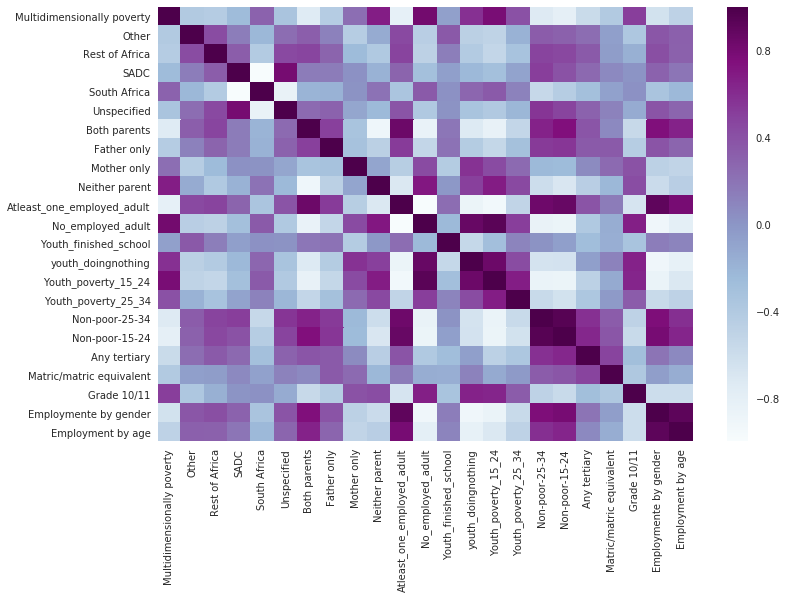

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(Inputfeatures.corr(),cmap="BuPu")
plt.show()

In [15]:
Inputfeatures.shape

(278, 23)

In [16]:
import matplotlib.cm as cm
from __future__ import division
from sklearn.decomposition import PCA

In [17]:
inputs_names = list(Inputfeatures.columns)
X = Inputfeatures.values
y = Outputfeature.values

In [18]:
colors=cm.rainbow(np.random.rand(9))
pca = PCA(n_components=2)
principalComponents  = pca.fit(X).transform(X)

principalDf = pd.DataFrame(data = principalComponents
             ,columns = ['principal component 1', 'principal component 2'])
principalDf.shape

(278, 2)

In [19]:
Outputfeature.head(2)

,Employment
1,0.271692
2,0.246790


In [20]:
finalDf = pd.concat([principalDf, Outputfeature], axis = 1)
finalDf.head(2)

,principal component 1,principal component 2,Employment
0,0.479948,-0.053344,NaN
1,0.382914,-0.065455,0.271692


In [21]:
# how much information (variance) can be attributed to each of the principal components

pca.explained_variance_ratio_

array([ 0.78563374,  0.09481427])

In [22]:
# how many of the original features contributed proportionally 
len(pca.components_[0])

23

In [23]:
X_pca = principalComponents 


In [24]:
colors = cm.rainbow(np.random.rand(len(pca.components_[0])))
max_1 = max(X_pca[:, 0])
max_2 = max(X_pca[:, 1])

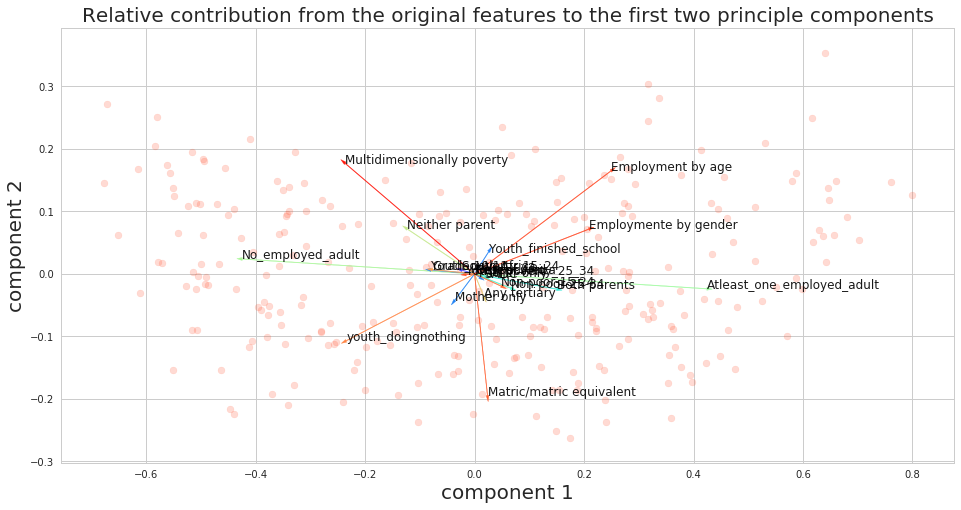

In [32]:
fig = plt.figure(figsize=(16, 8))
for i in range(0,len(pca.components_[0])):
    plt.arrow(0, 0, pca.components_[0][i]*max_1, pca.components_[1][i]*max_2, head_width=0.005, head_length=0.01, fc=colors[i], ec=colors[i])
    plt.text(pca.components_[0][i]*max_1, pca.components_[1][i]*max_2, inputs_names[i], color='black', alpha=0.9)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color = colors[i], alpha=.2)
plt.title('Relative contribution from the original features to the first two principle components',fontsize=20)

plt.xlabel('component 1',fontsize=20)
plt.ylabel('component 2',fontsize=20)
plt.legend()
plt.show()
fig.savefig('/home/dside/Documents/Csir_project//pca.jpg',dpi=100)

In [26]:
Newfeature = Inputfeatures[['Atleast_one_employed_adult',
              'No_employed_adult',
              'youth_doingnothing',
             'Multidimensionally poverty',
              'Neither parent',
              'Matric/matric equivalent','Employment by age']].corr()


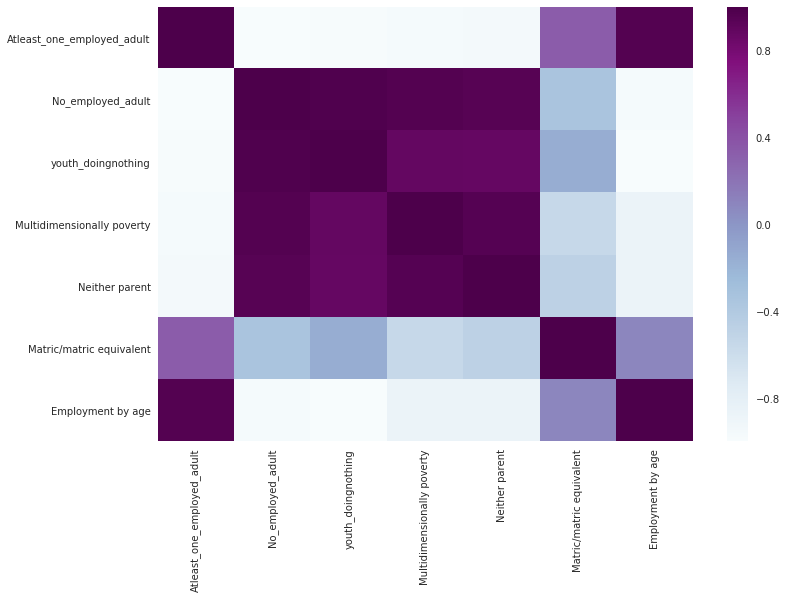

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(Newfeature.corr(),cmap="BuPu")
plt.show()